# Understanding Gradient Descent: From Basics to Deep Learning

## Introduction

This document aims to explain and visualize Gradient Descent, the workhorse algorithm behind much of machine learning and deep learning.

## 1. Core Concepts

* **Cost Function:** A function J(θ) we want to minimize (e.g., Mean Squared Error). θ represents the model parameters.
* **Parameters (θ):** The values the model uses to make predictions (e.g., slope 'm' and intercept 'b' in linear regression).
* **Gradient (∇J(θ)):** A vector of partial derivatives (∂J/∂θ₁, ∂J/∂θ₂, ...). It points in the direction of the *steepest increase* of the cost function.
* **Learning Rate (α):** A small positive value determining the step size we take during updates.
* **Update Rule:** θ := θ - α * ∇J(θ) (Move parameters in the direction *opposite* to the gradient).

## 2. Simple Example: Linear Regression

We'll fit a line (y = mx + b) to some noisy data. Our parameters are θ = [b, m] (note the order for matrix calculations later). Our cost function is Mean Squared Error (MSE): J(m, b) = (1/N) * Σ(yᵢ - (mxᵢ + b))²

### 2.1 Generate Sample Data


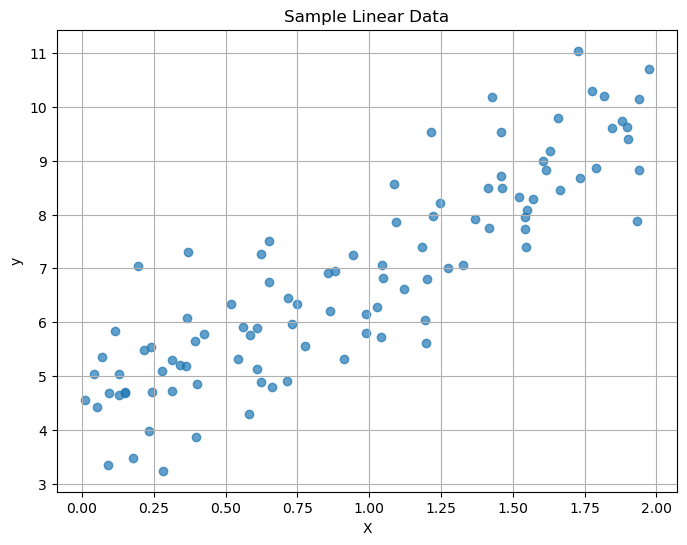

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate linear data with noise
X = 2 * np.random.rand(100, 1) # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + Gaussian noise

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample Linear Data")
plt.grid(True)
plt.show()


### 2.2 Define Cost Function and Gradients

In [10]:
# Add bias term (x₀=1) to X for easier matrix calculation
# This makes X_b have shape (100, 2) where the first column is all 1s
X_b = np.c_[np.ones((100, 1)), X] # Add x₀ = 1 to each instance

def calculate_cost(theta, X_b, y):
    """Calculates Mean Squared Error."""
    m = len(y)
    if m == 0: return float('inf') # Avoid division by zero
    predictions = X_b.dot(theta)
    # Using 1/(2*m) simplifies the gradient calculation derivative
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def calculate_gradients(theta, X_b, y):
    """Calculates gradients of the MSE cost function."""
    m = len(y)
    if m == 0: return np.zeros_like(theta) # Handle empty data case
    predictions = X_b.dot(theta)
    # Gradient formula for MSE: (1/m) * X_bᵀ * (X_bθ - y)
    gradients = (1/m) * X_b.T.dot(predictions - y)
    return gradients

# Initial parameters (theta = [b, m]) - start randomly or with zeros
initial_theta = np.random.randn(2, 1) # e.g., random start for b and m
print(f"Initial theta (b, m): {initial_theta.ravel()}")


Initial theta (b, m): [0.01300189 1.45353408]


### 2.3 Implement Batch Gradient Descent

In [11]:
def gradient_descent(X_b, y, initial_theta, learning_rate, n_iterations):
    """Performs Batch Gradient Descent."""
    theta = initial_theta.copy() # Start with initial parameters
    cost_history = []
    theta_history = [theta] # Store parameter history for visualization

    m = len(y)
    if m == 0: return theta, cost_history, theta_history # Handle empty data case

    print(f"Starting Gradient Descent: alpha={learning_rate}, iterations={n_iterations}")
    for iteration in range(n_iterations):
        cost = calculate_cost(theta, X_b, y)
        cost_history.append(cost)

        gradients = calculate_gradients(theta, X_b, y)
        theta = theta - learning_rate * gradients # Update rule
        theta_history.append(theta)

        if iteration % 100 == 0: # Print progress occasionally
             print(f"Iteration {iteration:4d}, Cost: {cost:.4f}, Theta: {theta.ravel()}")

    # Ensure the last cost is recorded if loop finishes
    if n_iterations > 0:
      final_cost = calculate_cost(theta, X_b, y)
      print(f"Final Cost: {final_cost:.4f}, Final Theta: {theta.ravel()}")
    else:
      final_cost = float('inf') # Or initial cost

    return theta, cost_history, theta_history

# Set hyperparameters
learning_rate = 0.1
n_iterations = 500

# Run Gradient Descent
final_theta, cost_history, theta_history = gradient_descent(X_b, y, initial_theta, learning_rate, n_iterations)

print(f"\nGradient Descent Results:")
print(f"Optimal b (intercept): {final_theta[0][0]:.4f}")
print(f"Optimal m (slope):     {final_theta[1][0]:.4f}")

# Compare with analytical solution (Normal Equation)
try:
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    print(f"\nAnalytical Solution (Normal Eq.):")
    print(f"Optimal b (intercept): {theta_best[0][0]:.4f}")
    print(f"Optimal m (slope):     {theta_best[1][0]:.4f}")
except np.linalg.LinAlgError:
    print("\nCould not compute analytical solution (matrix might be singular).")

Starting Gradient Descent: alpha=0.1, iterations=500
Iteration    0, Cost: 15.5047, Theta: [0.55701737 2.01124609]
Iteration  100, Cost: 0.4177, Theta: [3.91192334 3.03779851]
Iteration  200, Cost: 0.4038, Theta: [4.1603549  2.81844694]
Iteration  300, Cost: 0.4033, Theta: [4.20521201 2.77884055]
Iteration  400, Cost: 0.4033, Theta: [4.21331146 2.77168917]
Final Cost: 0.4033, Final Theta: [4.21476835 2.77040282]

Gradient Descent Results:
Optimal b (intercept): 4.2148
Optimal m (slope):     2.7704

Analytical Solution (Normal Eq.):
Optimal b (intercept): 4.2151
Optimal m (slope):     2.7701


## 3. Visualizing Gradient Descent
### 3.1 Cost Function Convergence

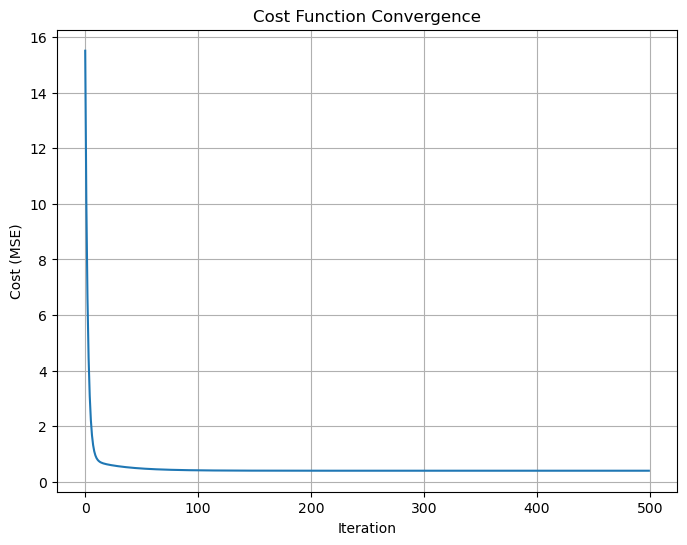

In [12]:
plt.figure(figsize=(8, 6))
# Ensure cost_history is not empty before plotting
if cost_history:
  plt.plot(range(len(cost_history)), cost_history) # Use actual length
  plt.xlabel("Iteration")
  plt.ylabel("Cost (MSE)")
  plt.title("Cost Function Convergence")
  plt.grid(True)
  plt.show()
else:
  print("Cost history is empty, cannot plot convergence.")


### 3.2 Regression Line Evolution (Static)


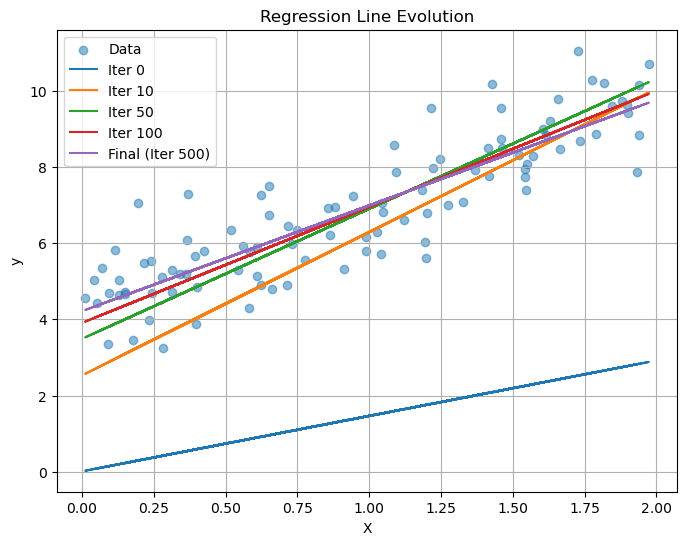

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label="Data")

# Plot lines for a few iterations
# Ensure theta_history is not empty and indices are valid
if theta_history:
    num_history = len(theta_history)
    # Adjust indices to ensure they are within bounds
    indices_to_plot = sorted(list(set([0, 10, 50, 100, num_history - 1])))
    indices_to_plot = [i for i in indices_to_plot if 0 <= i < num_history] # Filter valid indices

    for i in indices_to_plot:
        theta_i = theta_history[i]
        y_predict_i = X_b.dot(theta_i)
        label = f"Iter {i}" if i < num_history -1 else f"Final (Iter {i})"
        plt.plot(X, y_predict_i, label=label)

    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Regression Line Evolution")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Theta history is empty, cannot plot line evolution.")


### 3.3 Cost Surface and Parameter Path (Contour Plot)


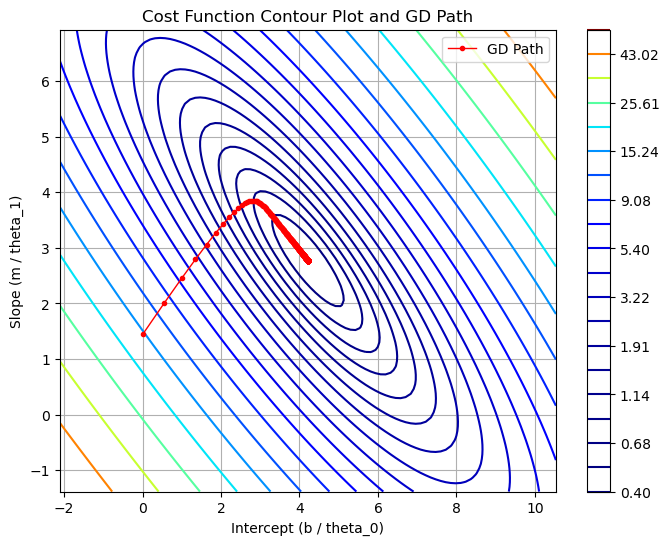

In [14]:
# Ensure final_theta exists before proceeding
if 'final_theta' in locals() and theta_history:
    # Create grid of theta values (b and m)
    # Adjust range based on final_theta if needed, ensure it's reasonable
    b_center, m_center = final_theta[0][0], final_theta[1][0]
    b_range = np.abs(b_center * 1.5) if b_center != 0 else 3 # Avoid range 0 if center is 0
    m_range = np.abs(m_center * 1.5) if m_center != 0 else 3

    theta0_vals = np.linspace(b_center - b_range, b_center + b_range, 100)
    theta1_vals = np.linspace(m_center - m_range, m_center + m_range, 100)
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    J_vals = np.zeros(T0.shape)

    # Calculate cost for each combination of thetas
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            t = np.array([[T0[i, j]], [T1[i, j]]])
            J_vals[i, j] = calculate_cost(t, X_b, y)

    # Plot contour
    plt.figure(figsize=(8, 6))
    # Adjust levels if necessary, logspace might cause issues if cost is very low/high
    levels = np.logspace(np.log10(max(np.min(J_vals[J_vals>0]), 1e-4)), np.log10(np.max(J_vals)), 20) if np.any(J_vals>0) else 20
    contour = plt.contour(T0, T1, J_vals, levels=levels, cmap=plt.cm.jet)
    plt.colorbar(contour)

    # Plot parameter path
    theta_path = np.array(theta_history).squeeze() # Convert list of arrays to 2D array
    if theta_path.ndim == 2 and theta_path.shape[1] == 2: # Check shape before plotting
        plt.plot(theta_path[:, 0], theta_path[:, 1], 'r-o', linewidth=1, markersize=3, label='GD Path')
    else:
        print("Theta path has unexpected shape, cannot plot path.")


    plt.xlabel("Intercept (b / theta_0)")
    plt.ylabel("Slope (m / theta_1)")
    plt.title("Cost Function Contour Plot and GD Path")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Final theta or theta history not available, cannot plot contour.")


### 3.4 Animation: Regression Line Evolution
This section would use Matplotlib's FuncAnimation or similar libraries (like Plotly for web). It would update both the regression line plot and the contour path plot in each frame. Implementing this requires more detailed code involving setting up the figure, axes, initial plot elements, and an update function.


In [15]:
# --- Animation Setup ---
# Requires matplotlib and pillow (pip install matplotlib pillow)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# Check if we have data to animate
if theta_history:
    # Create the figure and axes for the animation
    fig_anim, ax_anim = plt.subplots(figsize=(8, 6))

    # Initial plot elements
    ax_anim.scatter(X, y, alpha=0.5, label="Data") # Plot data points once
    line, = ax_anim.plot([], [], 'r-', linewidth=2, label="Regression Line") # Initial empty line
    iter_text = ax_anim.text(0.02, 0.95, '', transform=ax_anim.transAxes) # Text for iteration count

    # Set axis limits (adjust if necessary based on your data)
    ax_anim.set_xlim(X.min() - 0.1, X.max() + 0.1)
    ax_anim.set_ylim(y.min() - 1, y.max() + 1)
    ax_anim.set_xlabel("X")
    ax_anim.set_ylabel("y")
    ax_anim.set_title("Gradient Descent - Regression Line Evolution")
    ax_anim.legend(loc="lower right")
    ax_anim.grid(True)

    # How many history points to skip between frames for smoother/faster animation
    frame_skip = 5 # Adjust as needed
    num_frames = len(theta_history) // frame_skip

    # Initialization function (plots the background)
    def init():
        line.set_data([], [])
        iter_text.set_text('')
        return line, iter_text

    # Animation function (called for each frame)
    def update(frame):
        # Calculate the actual iteration index based on frame and skip rate
        iteration_index = frame * frame_skip
        if iteration_index >= len(theta_history):
             iteration_index = len(theta_history) - 1 # Ensure we don't go out of bounds

        theta_current = theta_history[iteration_index]
        y_predict_current = X_b.dot(theta_current)

        # Update the line data
        line.set_data(X, y_predict_current)
        # Update the iteration text
        iter_text.set_text(f'Iteration: {iteration_index}')
        return line, iter_text

    # Create the animation object
    # interval: delay between frames in milliseconds
    ani = FuncAnimation(fig_anim, update, frames=num_frames,
                        init_func=init, blit=True, interval=50)

    # --- Saving the Animation ---
    gif_filename = 'gradient_descent_line.gif'
    try:
        # You might need to install pillow: pip install pillow
        print(f"\nAttempting to save animation as {gif_filename}...")
        ani.save(gif_filename, writer='pillow', fps=15) # Use pillow writer
        print(f"Animation saved successfully as {gif_filename}")

        # Optional: Display in notebook if running in Jupyter/Colab
        # plt.close(fig_anim) # Close the static plot before showing HTML
        # display(HTML(ani.to_jshtml())) # Display interactive version in notebook

    except Exception as e:
        print(f"\nError saving animation: {e}")
        print("Ensure 'pillow' is installed (`pip install pillow`).")
        print("Alternatively, try saving as MP4 (requires ffmpeg) or using ani.to_jshtml().")

    # Close the figure to prevent static display if not showing HTML version
    plt.close(fig_anim)

else:
    print("Theta history is empty, cannot create animation.")




Attempting to save animation as gradient_descent_line.gif...
Animation saved successfully as gradient_descent_line.gif


## **4\. Gradient Descent Variants (Conceptual)**

### **4.1 Stochastic Gradient Descent (SGD)**

* **Idea:** Update parameters using the gradient calculated from *only one* randomly chosen training sample at each step.  
* **Update Rule:** θ := θ \- α \* ∇Jᵢ(θ) (where ∇Jᵢ is gradient for sample i)  
* **Pros:** Much faster updates per iteration (good for huge datasets), can escape shallow local minima.  
* **Cons:** Very noisy/oscillating convergence path, requires careful tuning of learning rate (often decreasing over time \- learning schedule).

### **4.2 Mini-Batch Gradient Descent**

* **Idea:** Update parameters using the gradient calculated from a *small random subset (mini-batch)* of training samples at each step.  
* **Pros:** Compromise between Batch GD and SGD. Less noisy than SGD, more computationally efficient than Batch GD (allows vectorization), standard in Deep Learning.  
* **Cons:** Introduces another hyperparameter (batch size).

### **4.3 Advanced Optimizers**

* **Momentum, RMSprop, Adam:** Address challenges like navigating ravines, saddle points, and choosing a good learning rate. They incorporate information from past gradients (momentum) or adapt the learning rate per parameter. Adam is very commonly used.

## **5\. Connection to Deep Learning**

* Neural networks are essentially complex functions with potentially millions of parameters (weights and biases in different layers).  
* The goal of training is to find the parameter values that minimize a loss function (e.g., cross-entropy for classification) comparing the network's output to the true labels.  
* **Gradient Descent (usually Mini-Batch with Adam/RMSprop) is the core algorithm used to perform this minimization.**  
* **Backpropagation:** This is *not* an optimizer itself, but rather the *efficient algorithm* used to calculate the gradients (∇J(θ)) of the loss function with respect to *all* the parameters throughout the deep network. These calculated gradients are then fed into the Gradient Descent update rule.

### 5.1 Simple Neural Network Example (Conceptual / High-Level Code)


In [16]:
# Conceptual Example using a library like Keras/TensorFlow
# Ensure tensorflow is installed: pip install tensorflow
try:
    import tensorflow as tf
    from tensorflow import keras

    # Assume you have preprocessed MNIST data: x_train_nn, y_train_nn
    # (Loading MNIST requires TF or other libraries)
    # (x_train_nn, y_train_nn), _ = keras.datasets.mnist.load_data()
    # x_train_nn = x_train_nn.astype("float32") / 255.0
    # y_train_nn = y_train_nn # Use sparse labels for sparse_categorical_crossentropy

    model_nn = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)), # Flatten image
        keras.layers.Dense(128, activation='relu'),  # Hidden layer
        keras.layers.Dense(10, activation='softmax')  # Output layer (10 digits)
    ])

    # Compiling specifies the optimizer (which uses GD variants) and loss
    model_nn.compile(optimizer='adam', # Adam uses adaptive learning rates based on GD
                   loss='sparse_categorical_crossentropy', # Common loss for classification
                   metrics=['accuracy'])

    print("\n--- Simple Neural Network Structure ---")
    model_nn.summary()
    print("\nTraining a simple Neural Network (Conceptual):")
    # The .fit() method handles the mini-batching, gradient calculation (backprop),
    # and parameter updates (using the 'adam' optimizer based on GD).
    # Example: model_nn.fit(x_train_nn, y_train_nn, epochs=1, batch_size=32)
    print("--> The .fit() method implicitly uses Gradient Descent variants + Backpropagation.")
    print("    It iterates over mini-batches, calculates loss, computes gradients via backprop,")
    print("    and updates model weights using the chosen optimizer (e.g., Adam).")

except ImportError:
    print("\nTensorFlow not installed. Skipping conceptual NN example.")
    print("Install using: pip install tensorflow")


--- Simple Neural Network Structure ---
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________

Training a simple Neural Network (Conceptual):
--> The .fit() method implicitly uses Gradient Descent variants + Backpropagation.
    It iterates over mini-batches, calculates loss, computes gradients via backprop,
    and updates model weights using the chosen optimize



Explain that the model.fit() call abstracts away the manual GD loop we did earlier, but internally it's performing similar steps (calculating gradients via
